## Analiza jakości i satysfakcji z życia obywateli krajów Europy - Modelowanie zależności w danych ekonomicznych 

### Wprowadzenie 

Celem analizy jest kategoryzacja krajów Europejskich ze względu na wybrane miary ekonomiczno - społeczne mogące wpływać lub określać na poziom jakości życia w danym kraju oraz zbadanie czynników wpływających <br>
na poziom zadowolenia z życia. Mimo stałego rozwoju regionu w ostatnich latach młodzi dorośli mierzą się z wieloma nowymi wyzwaniami, związanymi z rynkiem mieszkaniowym czy chorobami cywizilzacyjnymi, <br>
które przyczyniają się do odosobnienia i gorszego samopoczucia. W czołówce krajów których mieszkańcy najlepiej oceniają satysfakcję z życia plasuje się Islandia, Szwajcaria czy Polska. <br>
Światowe raporty szczęścia, takie jak te publikowane przez World Happiness Report, pokazują, że kraje o wyższym PKB na mieszkańca mają tendencję do wyższych poziomów satysfakcji z życia. <br>
Niemniej jednak, ważne jest także uwzględnienie innych aspektów, które mogą być na wyższym poziomie w mniej rozwiniętych krajach (Esteban Ortiz-Ospina i Max Roser 2024). <br>
Zrozumienie, co wpływa na szczęście obywateli, może pomóc rządom i organizacjom w tworzeniu polityk, które poprawiają ogólny dobrostan społeczeństwa. Na przykład, zwiększenie dostępu do usług publicznych, <br>
poprawa warunków pracy i wsparcie dla zdrowia psychicznego to tylko niektóre z działań, które mogą być inspirowane wynikami takich badań (Tyler J. VanderWeele Ph.D. 2022). <br>
Projekt ma na celu odpowiedzenie na następujące pytania badawcze:

* W jakim stopniu zadowolenie z życia osób w wieku 25-34 lata można wyjaśnić zmiennymi określającymi stan samopoczucia, zdrowia i dostępu do opieki oraz stanem ekonomicznym kraju?
* Czy zadowolenie z życia i wysoka dzietność są ze sobą ściśle powiązane?
* Które kraje Europy zbliżone geograficznie i kulturowo charakteryzują się zbliżoną oceną zadowolenie z życia, stanu zdrowia i dzietności?


### Metody badawcze

Wybrano najnowsze dane dla wybranych zmiennych pochodzące z 2022 roku. Wartości pobrano z portalu Eurostat dla osób w przedziale wiekowym od 25 do 34 lat. Poniżej znajduje się opis wybranych zmiennych oraz skrótowa nazwa wykorzystana w analizie: 

* gdp - PKB per Capita 
* med. - zgłaszane niezaspokojone potrzeby w zakresie badań lekarskich, ponieważ podróż lub lista oczekujących jest zbyt kosztowna lub zbyt daleka
* ilc hp - odsetek osób które uważają, że w ostatnich 4 tygodniach nie były szczęśliwe ani razu
* ilc_sat - wskaźnik ogólnej satysfakcjii z życia 
* fer - wskaźnik dzietności 
* empl - wskaźnik osób niepracujących oraz niekształcących się 
* hlth - wskaźnik złego lub bardzo złego stanu zdrowia 

Cześć krajów nie posiadała danych części zmiennych dla określonego roku, uzupełniono więc braki wartościami z lat poprzednich. Poniżej znajduje się lista wykonanych operacji w ramach uzupełniania braków:
Szwajcaria (empl) wartośc z 2020 roku, Niemcy (ilc_hp) wartość z 2018 roku, Islandia (med) z 2019 r (ilc_hp) z 2018 (ilc_sat) z 2018 (hlth) z 2019 roku, Montenegro (empl) z 2020 (med) z 2021 roku, <br>
Macedonia Północna (gdp) z 2021 (med) z 2020 (ilc_hp) z 2018 (ilc_sat) z 2018 (empl) z 2020 (hlth) z 2020 roku, Turcja (med) z 2021 (hlth) z 2019 roku. <br> 
W sumie w analizie wzięły udział 34 kraje.

W projekcie wykorzystane następujące metody: korelacje Spearmna i Pearsona, regresja liniowa, analiza skupień z wykorzystaniem metody Warda i metody k-średnich.

### Import pakieów i przekształcenia

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import  set_link_color_palette, linkage, dendrogram, cut_tree
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np 
from scipy import stats
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import statsmodels.api as sm 
import os
from statsmodels.stats.diagnostic import het_white
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
data = pd.read_excel('C:/JupyterLab/EU_citizens_satisfaction/data/raw/Data.xlsx') 
data.head()

,Unnamed: 0,gdp,med.,ilc_hp,ilc_sat,fer,empl,hlth
0,Belgium,37050,0.8,1.0,7.6,0.09275,14.2,2.7
1,Bulgaria,7680,0.9,2.3,6.0,0.09683,19.4,0.9
2,Czechia,18460,0.2,1.4,7.8,0.10641,18.7,2.3
3,Denmark,51660,2.8,1.8,7.3,0.09583,10.7,6.4
4,Germany,36010,0.4,0.8,6.6,0.07671,12.5,3.2


In [3]:
data = data.rename(columns={'Unnamed: 0': 'Country'})
data.head()

,Country,gdp,med.,ilc_hp,ilc_sat,fer,empl,hlth
0,Belgium,37050,0.8,1.0,7.6,0.09275,14.2,2.7
1,Bulgaria,7680,0.9,2.3,6.0,0.09683,19.4,0.9
2,Czechia,18460,0.2,1.4,7.8,0.10641,18.7,2.3
3,Denmark,51660,2.8,1.8,7.3,0.09583,10.7,6.4
4,Germany,36010,0.4,0.8,6.6,0.07671,12.5,3.2


In [4]:
data = data.set_index('Country')
data.head()

,gdp,med.,ilc_hp,ilc_sat,fer,empl,hlth
Country,,,,,,,
Belgium,37050,0.8,1.0,7.6,0.09275,14.2,2.7
Bulgaria,7680,0.9,2.3,6.0,0.09683,19.4,0.9
Czechia,18460,0.2,1.4,7.8,0.10641,18.7,2.3
Denmark,51660,2.8,1.8,7.3,0.09583,10.7,6.4
Germany,36010,0.4,0.8,6.6,0.07671,12.5,3.2


In [5]:
data.to_excel("C:/JupyterLab/EU_citizens_satisfaction/data/processed/data_changed.xlsx", index=False)

### Analiza

#### Wykresy pudełkowe

<Axes: xlabel='gdp'>

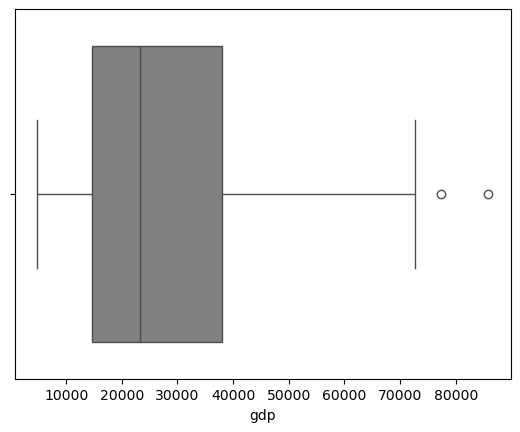

In [6]:
sns.boxplot(x=data['gdp'], color= '.5')

<Axes: xlabel='med.'>

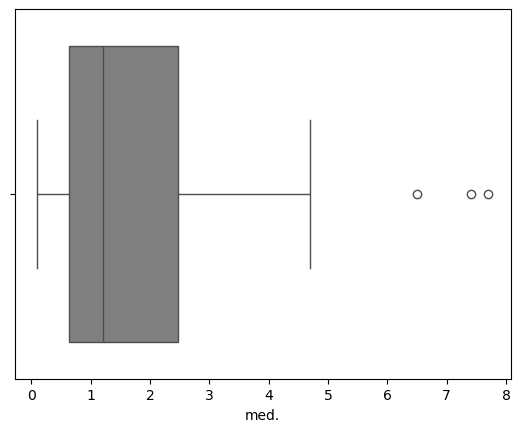

In [7]:
sns.boxplot(x=data['med.'], color= '.5')

<Axes: xlabel='ilc_hp'>

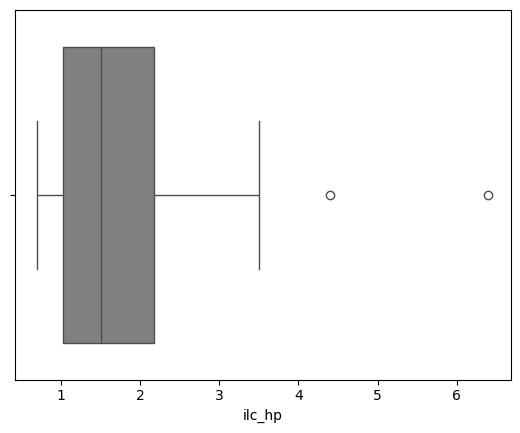

In [8]:
sns.boxplot(x=data['ilc_hp'], color= '.5')

<Axes: xlabel='ilc_sat'>

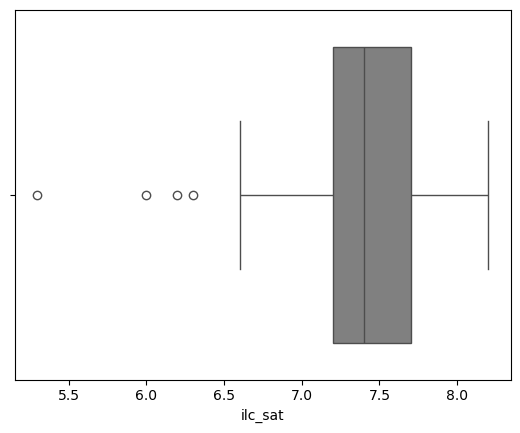

In [9]:
sns.boxplot(x=data['ilc_sat'], color= '.5')

<Axes: xlabel='fer'>

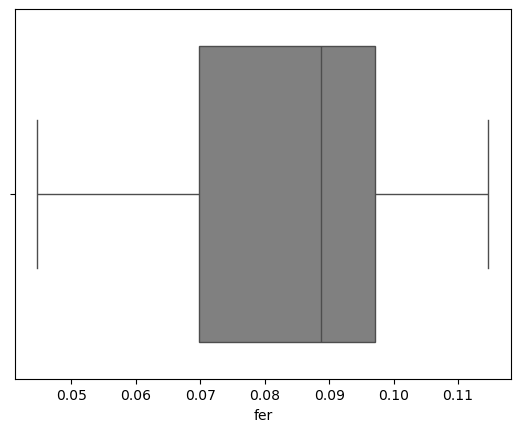

In [10]:
sns.boxplot(x=data['fer'], color= '.5')

<Axes: xlabel='empl'>

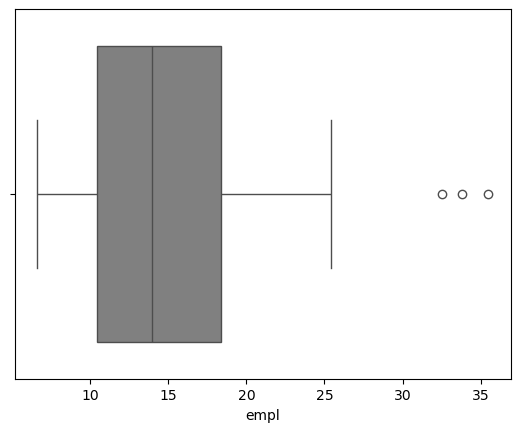

In [11]:
sns.boxplot(x=data['empl'], color= '.5')

<Axes: xlabel='hlth'>

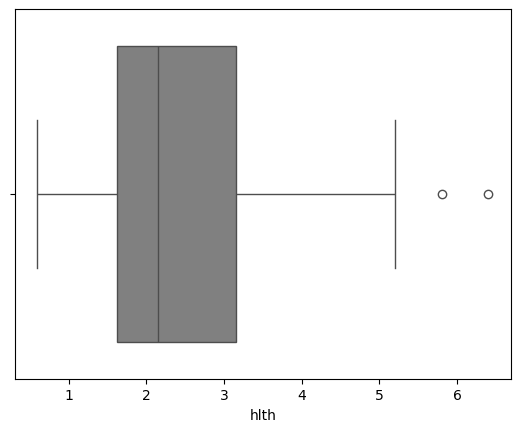

In [12]:
sns.boxplot(x=data['hlth'], color= '.5')

Tylko zmienna fer nie posiada obserwacji odstających. Dla med., ilc_sat i empl obserwacji nietypowych jest więcej niż dwie, stanowiąc 8% lub 12% wszystkich obserwacji. Może to wpłynąć na wyniki <br>
analiz wrażliwych na obserwacje odstające.

#### Wykresy rozrzutu

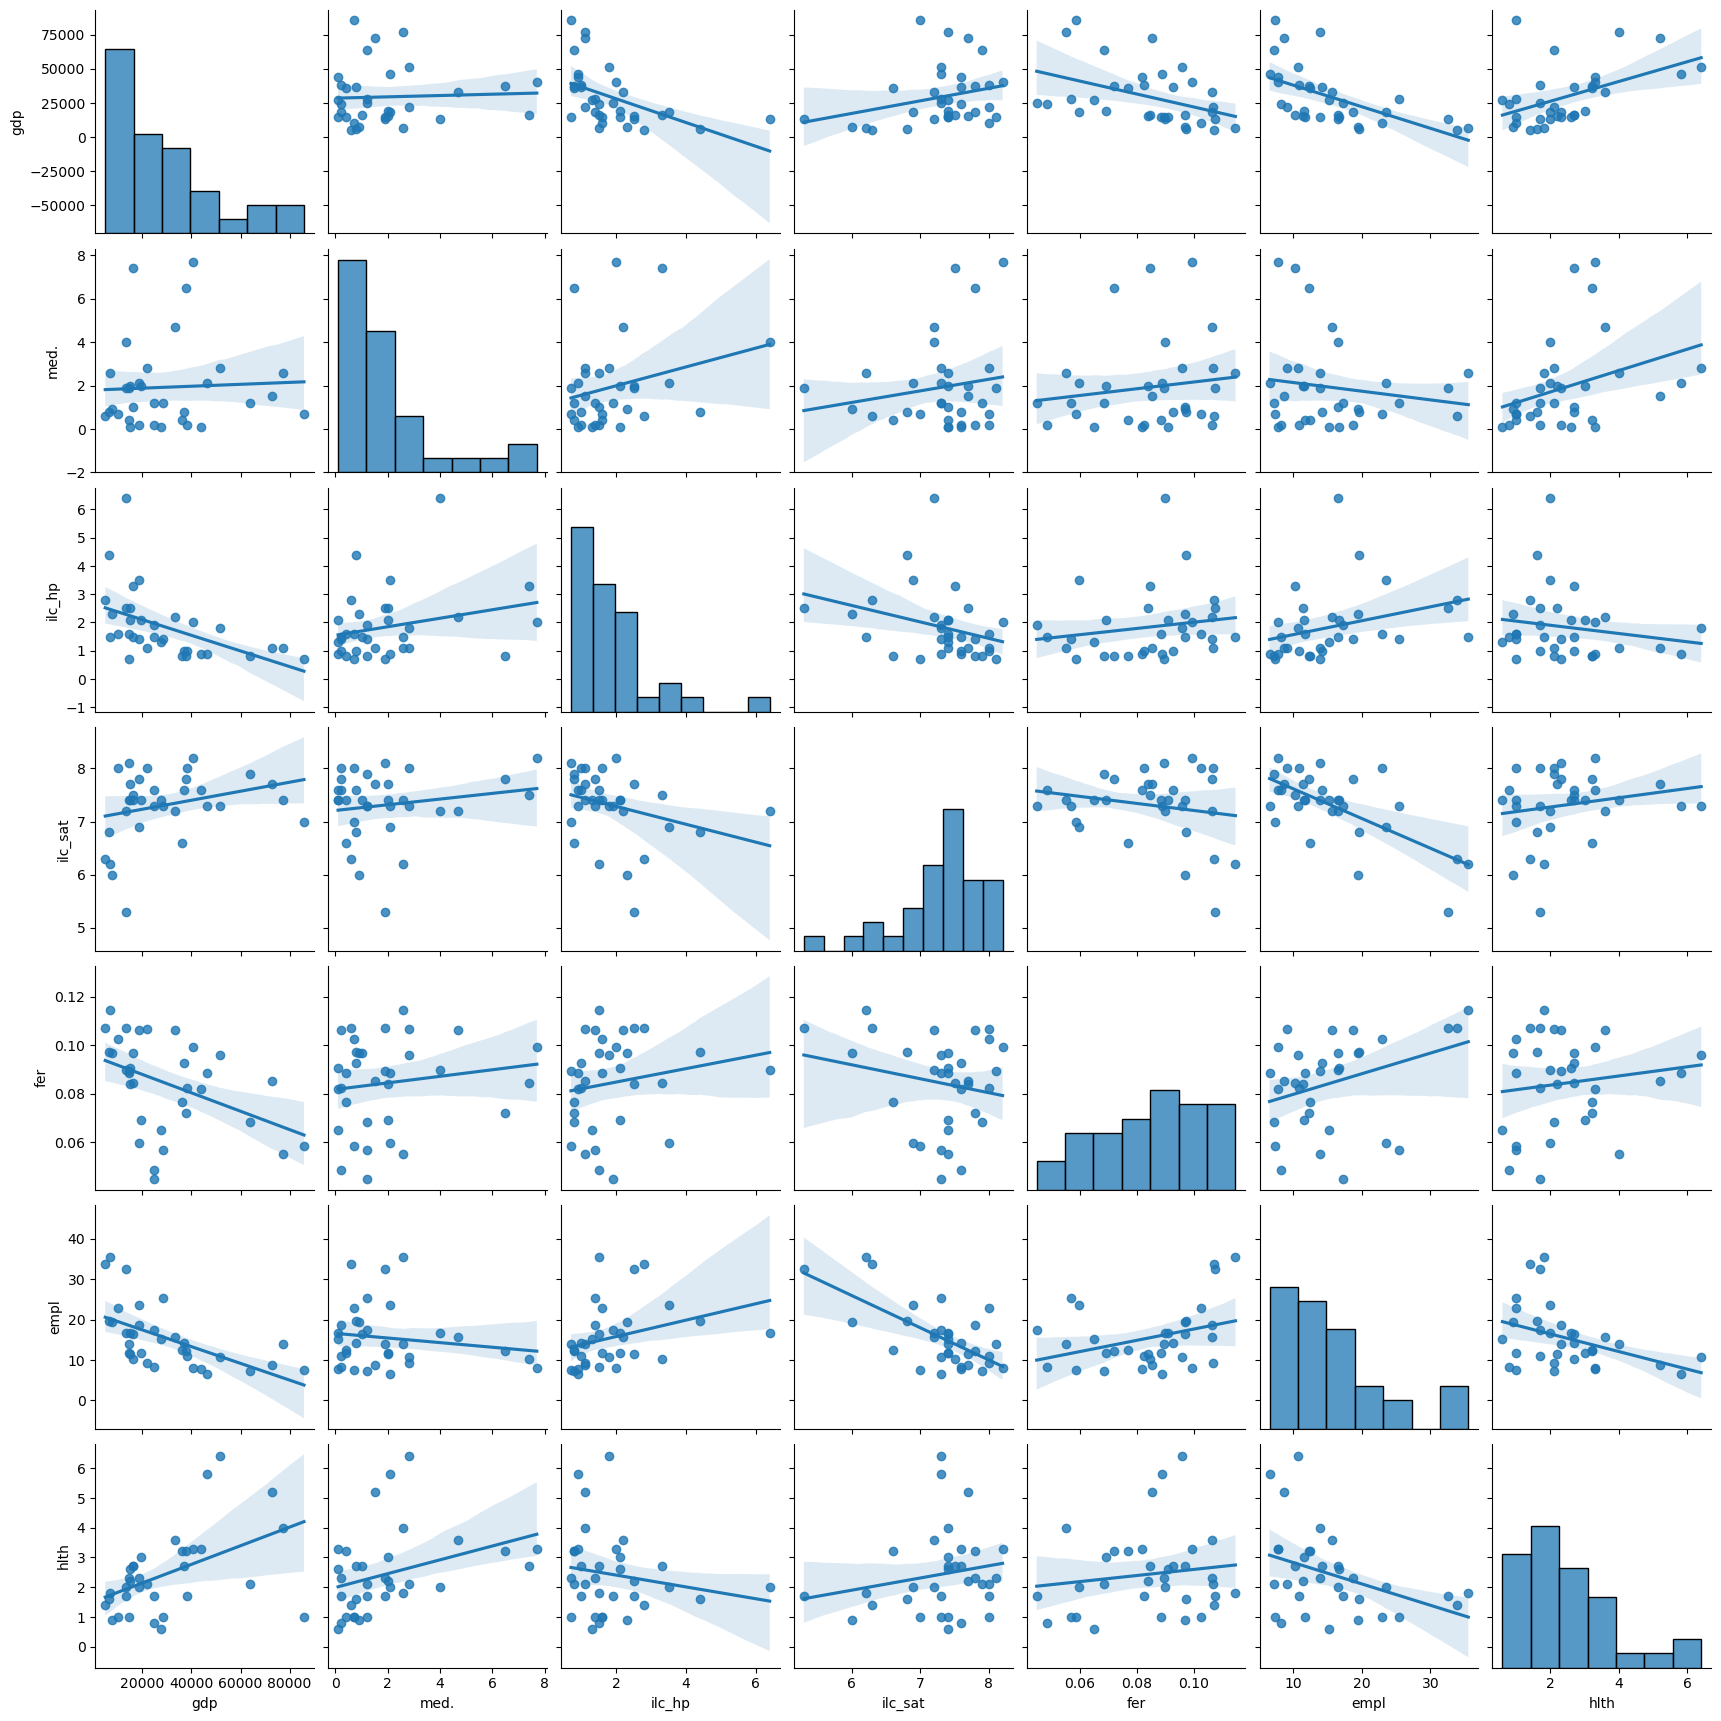

In [13]:
sns.pairplot(data, kind='reg')

Na wykresach rozrzutu również możemy dostrzec obserwacje odstające dla wielu zmiennych. Zmienna empl wydaje się być najsilniej powiązana z ilc_sat zależnością liniową.

#### Korelacje 

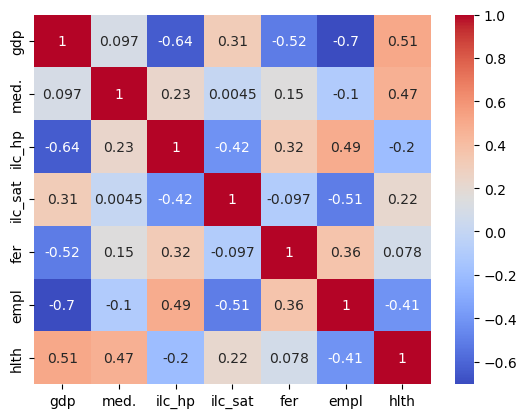

In [14]:
corr = data.corr(method = 'spearman')

sns.heatmap(corr, annot = True, cmap='coolwarm')

plt.show()

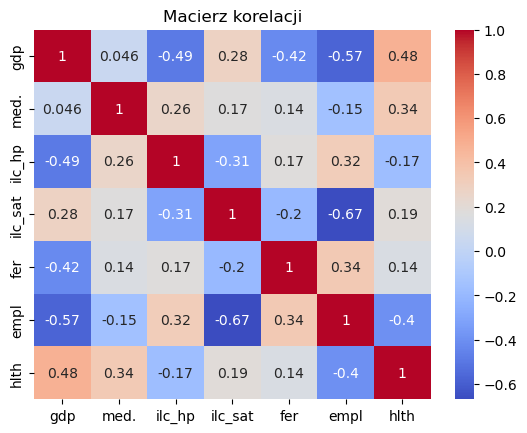

In [15]:
data_corr = data.corr(method = 'pearson')
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [16]:
res = stats.pearsonr(data['empl'], data['ilc_sat'])
res

PearsonRResult(statistic=np.float64(-0.6685469868375375), pvalue=np.float64(1.550130457713482e-05))

W macierzy korelacji rang Spearmana i korelacji liniowej Perasona uzyskano dość zróżnicowane wartości. Jedną z przyczyn może być występowanie zależności innej niż liniowa <br>
oraz odnotowane wcześniej obserwacje odstające. Wybrane zmienne objaśniające są w większośći słabo skorelowane ze zmienną określającą satysfakcję z życia, jedynie empl wykazuje silny związek z ilc_sat. <br>
Dodatkowo część zmiennych jest umiarkowanie skorelowana z gdp, co może negatywnie wpłynąć na jakość modelu. Współczynnik dzietności jest słabo skorelowany z satysfakcją z życia, <br>
na podstawie uzyskanych korelacji należy więc uznać że posiadanie dziecka nie wpływa wyraźnie na poczucie satysfkakcji z życia.

#### Współczynniki zmienności

In [17]:
data_zm = data.std() / data.mean() * 100
data_zm

gdp         71.450267
med.       104.486743
ilc_hp      64.464605
ilc_sat      8.707079
fer         22.277867
empl        49.048400
hlth        56.596102
dtype: float64

Żadna ze zmiennych objaśniających nie charakteryzuje się zmiennością niższą niż 10%, w równaniu regresji liniowej uwzględniono zatem każdą z nich.

#### Model regresji liniowej

Z uwagi na niskie skorelowanie zmiennych objaśniających z satysfakcją z życia, równanie prostej regresji prawdopodobnie wykaże istotność tylko kilku zmiennych.

In [18]:
end_var = data['ilc_sat']
ex_var = data[['gdp', 'med.', 'ilc_hp', 'fer', 'empl', 'hlth']]

In [19]:
ex_var = sm.add_constant(ex_var)

In [20]:
model = sm.OLS(end_var, ex_var).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     4.754
Date:                Thu, 18 Sep 2025   Prob (F-statistic):            0.00200
Time:                        12:52:34   Log-Likelihood:                -20.127
No. Observations:                  34   AIC:                             54.25
Df Residuals:                      27   BIC:                             64.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7400      0.604     14.465      0.000       7.500       9.980
gdp        -7.046e-06   6.43e-06     -1.095      0.283   -2.02e-05    6.16e-06
med.           0.0521      0.049      1.072      0.293      -0.048       0.152
ilc_hp        -0.1351      0.089     -1.526      0.139      -0.317       0.047
fer           -0.4014      5.770     -0.070      0.945     -12.241      11.438
empl          -0.0610      0.015     -4.191      0.000      -0.091      -0.031
hlth          -0.0390      0.084     -0.463      0.647      -0.212       0.134
==============================================================================
Omnibus:                        5.691   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.129
Skew:                          -0.701   Prob(JB):                        0.127
Kurtosis:                       3.975   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

W oszacowanym modelu występuje wyraźna różnica pomiędzy wartością współczynnika R-squared i adjusted R-squared. Sugeruje to, że w modelu uwzględniono zmienne nie wpływające istotnie na poprawę <br>
dopasowania modelu. Wynik testu F wskazuje, że przynajmniej jedna zmienna w modelu jest istotna statystycznie. W istocie wszystkie z wyjątkiem empl zmienne uzyskały dla testu t-studenta wartości p-value <br>
przekraczające przyjęty poziom wynoszący 0,05. W pierwszej kolejności odrzucono zmienną dotyczącą wskaźnika urodzeń, ze względu na zdecydowanie najwyższą wartość p-value. <br>
Na podstawie rezultatów testu Jarque-Bera można stwierdzić, że rozkład reszt jest normalny. Prawodpodobieństwa dla testu Omnibus mówi nam, że z prawodpodobieństwem 0,058 rozkład reszt nie jest normalny. <br>

Normalność rozkładu reszt umożliwiła wykonanie testu na homoskedastyczność reszt modelu. Hipoteza zerowa testu White'a zakłada homoskedastyczność reszt, która jest istotna dla <br>
wiarygodności uzyskanych parametrów modelu. Wykonano również test RESET, sprawdzający czy dobrana została odpowiednia postać modelu.

Test White'a

In [21]:
exog = model.model.exog
white_test = het_white(model.resid, exog)
labels = ['Statystyka testu White\'a', 'p-value', 'Statystyka F', 'p-value']
print(dict(zip(labels, white_test)))

{"Statystyka testu White'a": np.float64(28.899894901381124), 'p-value': np.float64(0.4173426057865295), 'Statystyka F': np.float64(1.2592287301516065)}


Na podstawie wartości p-value nie ma podstaw do odrzucenia hipotezy zerowej, reszty w modelu regresji są homoskedastyczne.

Test RESET

In [22]:
data_np = data.to_numpy()
X = data_np[:, [0,1,2,4,5,6]] 
y = data_np[:, 3] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
reset_test = sm.stats.diagnostic.linear_reset(model)
reset_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.8219998351099775, p-value=0.14793239242067363, df_denom=2>

Na podstawie wartości p-value nie ma podstaw do odrzucenia hipotezy zerowej, liniowa postać modelu jest poprawna.

##### Model 2

Odrzucono zmienną fer ze względu na najwyższą wartość p-value dla testu t-studenta.

In [23]:
end_var_1 = data['ilc_sat']
ex_var_1 = data[['gdp', 'med.', 'ilc_hp', 'empl', 'hlth']]

In [24]:
ex_var_1 = sm.add_constant(ex_var_1)

In [25]:
model_1 = sm.OLS(end_var_1, ex_var_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     5.914
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           0.000750
Time:                        12:52:35   Log-Likelihood:                -20.131
No. Observations:                  34   AIC:                             52.26
Df Residuals:                      28   BIC:                             61.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7094      0.407     21.421      0.000       7.876       9.542
gdp        -6.845e-06   5.65e-06     -1.212      0.235   -1.84e-05    4.72e-06
med.           0.0518      0.048      1.090      0.285      -0.046       0.149
ilc_hp        -0.1343      0.086     -1.558      0.131      -0.311       0.042
empl          -0.0612      0.014     -4.428      0.000      -0.090      -0.033
hlth          -0.0415      0.075     -0.555      0.583      -0.195       0.112
==============================================================================
Omnibus:                        5.845   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.279
Skew:                          -0.716   Prob(JB):                        0.118
Kurtosis:                       3.986   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Usunięcie zmiennej fer nieznczanie pozytywnie wpłynęło na wartości współczynnik adjusted R-squared. W kolejnym kroku odrzucono czynnik htlh i med. <br>
Również w tym modelu rozkład reszt jest normalny, autokorelacja reszt nie występuje a prawdopodobieństwo dla testu Omnibus wskazuje, że rokład reszt nie jest normalny. 

##### Model 3

In [26]:
end_var_2 = data['ilc_sat']
ex_var_2 = data[['gdp', 'ilc_hp', 'empl']]
ex_var_2 = sm.add_constant(ex_var_2)

model_2 = sm.OLS(end_var_2, ex_var_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     9.696
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           0.000124
Time:                        12:52:35   Log-Likelihood:                -20.861
No. Observations:                  34   AIC:                             49.72
Df Residuals:                      30   BIC:                             55.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6937      0.377     23.057      0.000       7.924       9.464
gdp        -7.413e-06   5.24e-06     -1.415      0.167   -1.81e-05    3.29e-06
ilc_hp        -0.1058      0.080     -1.318      0.198      -0.270       0.058
empl          -0.0626      0.013     -4.698      0.000      -0.090      -0.035
==============================================================================
Omnibus:                        5.470   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.903
Skew:                          -0.713   Prob(JB):                        0.142
Kurtosis:                       3.849   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Odrzucenie kolejnej zmiennej nieznacznie poprawiło parametr adjsuted R-squared. Wartość wciąż jest niewielka, sugerując niską użyteczność prostej regresji względem wyjaśniania zmiennośći zmiennej endogenicznej.
Przyczyną może być brak weryfikacji homoskedastyczności zmiennych objaśniających oraz niską korelację niektórych czynników ze zmienną objaśnianą. <br>
Wyniki testów Omnibus, Durbin - Watsona i JB nie zmieniają się w sposób wyraźny, wnioski są idnetyczne jak we wcześniej obliczonych modelach. Z powodu niewielkiej poprawy jakości kolejnego modelu <br>
zdecydowano o zaprzestaniu odrzucania kolejnych zmiennych.

Test White'a

In [27]:
exog = model_2.model.exog
white_test = het_white(model_2.resid, exog)
labels = ['Statystyka testu White\'a', 'p-value', 'Statystyka F', 'p-value']
print(dict(zip(labels, white_test)))

{"Statystyka testu White'a": np.float64(5.460656599832525), 'p-value': np.float64(0.8526206897822399), 'Statystyka F': np.float64(0.5102342660343503)}


Test White'a ponownie potwierdził homoskedastyczność reszt modelu.

Test RESET

In [28]:
data_np = data.to_numpy()
X = data_np[:, [0,2,5]] 
y = data_np[:, 3] 
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()
reset_test = sm.stats.diagnostic.linear_reset(model_3)
reset_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.253765574775315, p-value=0.19654128118165126, df_denom=2>

Liniowa postać modelu jest prawidłowa

##### Model 4

Na koniec obliczono również równanie regresji uwzględniając jedynie najsilniej skorelowaną zmienną związaną z zatrudnieniem.

In [29]:
end_var_3 = data['ilc_sat']
ex_var_3 = data[['empl']]
ex_var_3 = sm.add_constant(ex_var_3)

model_3 = sm.OLS(end_var_3, ex_var_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ilc_sat   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     25.86
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.55e-05
Time:                        12:52:35   Log-Likelihood:                -22.314
No. Observations:                  34   AIC:                             48.63
Df Residuals:                      32   BIC:                             51.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1795      0.190     43.160      0.000       7.793       8.566
empl          -0.0561      0.011     -5.085      0.000      -0.079      -0.034
==============================================================================
Omnibus:                        2.617   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.416
Skew:                          -0.394   Prob(JB):                        0.493
Kurtosis:                       3.616   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Parametr zmiennej empl zgodnie z oczekiwaniami jest istotny. Statystyki R-squared uzyskały nieznacznie gorsze wyniki w porównaniu z pozostałymi modelami. Należy uznać, że wybrane zmienne zbyt słabo wyjaśniają <br>
satysfakcję z życia młodych dorosłych i nie wpływają istotnie na poprawę jakości modelu.

Test White'a

In [30]:
exog = model_3.model.exog
white_test = het_white(model_3.resid, exog)
labels = ['Statystyka testu White\'a', 'p-value', 'Statystyka F', 'p-value']
print(dict(zip(labels, white_test)))

{"Statystyka testu White'a": np.float64(2.5750843734959457), 'p-value': np.float64(0.2950024689289097), 'Statystyka F': np.float64(1.2701325363471623)}


Wyniki testu White'a wskazują, że spełnione jest założenie dot. homoskedastyczności modelu. 

Test RESET

In [31]:
data_np = data.to_numpy()
X = data_np[:, 5] 
y = data_np[:, 3] 
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()
reset_test = sm.stats.diagnostic.linear_reset(model_3)
reset_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1.8739704142916018, p-value=0.3918072743540148, df_denom=2>

Wartość p-value uzyskanego w ramach testu RESET (ang. Regression Equation Specification Error Test) wskazuje że postać funkcyjna modelu jest prawidłowa. 

#### Analiza skupień

##### Metoda k -średnich

W pierwszej dokonano standaryzacji zmiennych i sprawdzono, jaka liczba skupień jest optymalna. W analizie skupień nie wykorzystano zmiennych gdp i empl, w celu zmniejszenia zakresu <br>
tematycznego danych i możliwie lepszego dopasowania obiektów do klas na podstawie mniejszej liczby czynników.

In [32]:
os.environ['OMP_NUM_THREADS']='1'
print(os.environ["OMP_NUM_THREADS"])

1


In [33]:
data_drop = data.loc[:,['med.','ilc_hp','ilc_sat','fer','hlth']]
data_drop.head()

,med.,ilc_hp,ilc_sat,fer,hlth
Country,,,,,
Belgium,0.8,1.0,7.6,0.09275,2.7
Bulgaria,0.9,2.3,6.0,0.09683,0.9
Czechia,0.2,1.4,7.8,0.10641,2.3
Denmark,2.8,1.8,7.3,0.09583,6.4
Germany,0.4,0.8,6.6,0.07671,3.2


In [34]:
scaler = StandardScaler() 

data_std = pd.DataFrame(scaler.fit_transform(data_drop),
                               columns=data_drop.columns,
                                 index=data_drop.index)
                               
data_std.head()

,med.,ilc_hp,ilc_sat,fer,hlth
Country,,,,,
Belgium,-0.567423,-0.718003,0.459552,0.449477,0.192545
Bulgaria,-0.516919,0.395531,-2.091432,0.669676,-1.131470
Czechia,-0.870445,-0.375377,0.778425,1.186711,-0.101681
Denmark,0.442649,-0.032751,-0.018757,0.615705,2.914131
Germany,-0.769437,-0.889315,-1.134813,-0.416206,0.560327


In [35]:
score = []
for k in range(2, 8):
    km = KMeans(n_clusters=k,
                 init='random',
                 random_state=15,
                 n_init=20)
    results_km = km.fit(data_std)
    coefficient = silhouette_score(data_std, results_km.labels_)
    score.append(coefficient)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

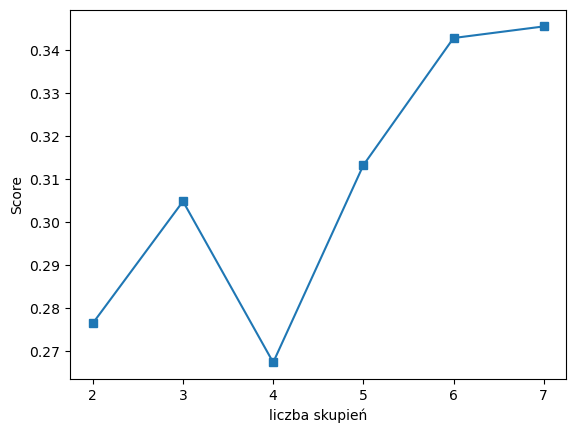

In [36]:
plt.plot(range(2,8), score,
        marker='s')
plt.xlabel('liczba skupień')
plt.ylabel('Score')
plt.show()

Zdecydowano o wyborze 6 skupień do analizy. Wartość 0,34 wskaźnika Silhouette wskazuje na przeciętne dopasowanie obiektów do klas. 

In [37]:
kmeans = KMeans(n_clusters=6,
                init='random',
                random_state=15,
                n_init=30)

results = kmeans.fit(data_std)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
results.inertia_

45.91117284343531

In [39]:
df_results = pd.DataFrame(results.cluster_centers_,
                          columns=data_std.columns)
df_results

,med.,ilc_hp,ilc_sat,fer,hlth
0,-0.213898,0.374117,-2.171150,1.192512,-0.726910
1,-0.628027,-0.409639,0.013130,-1.607869,-1.043203
2,2.349161,0.202804,0.579130,0.332362,0.560327
3,0.190131,2.508390,-0.550212,-0.115771,-0.420425
4,-0.473631,-0.405968,0.516494,0.212316,-0.101681
5,0.164879,-0.525276,0.180538,-0.171316,2.141789


In [40]:
results.labels_

array([4, 0, 4, 5, 4, 2, 5, 3, 1, 2, 4, 1, 1, 3, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 2, 5, 2, 5, 4, 0, 0, 3, 0], dtype=int32)

In [41]:
data_drop['skupienie'] = results.labels_

In [42]:
n_rclusters = 6
for i in range(n_rclusters):
    print(f'''W skupieniu {i} są następujące obiekty:\
    {data_drop[data_drop['skupienie'] == i].index.values}''')

W skupieniu 0 są następujące obiekty:    ['Bulgaria' 'Montenegro' 'North Macedonia' 'Türkiye']
W skupieniu 1 są następujące obiekty:    ['Spain' 'Italy' 'Cyprus' 'Luxembourg' 'Malta']
W skupieniu 2 są następujące obiekty:    ['Estonia' 'France' 'Finland' 'Iceland']
W skupieniu 3 są następujące obiekty:    ['Greece' 'Latvia' 'Serbia']
W skupieniu 4 są następujące obiekty:    ['Belgium' 'Czechia' 'Germany' 'Croatia' 'Lithuania' 'Hungary'
 'Netherlands' 'Austria' 'Poland' 'Portugal' 'Romania' 'Slovenia'
 'Slovakia' 'Switzerland']
W skupieniu 5 są następujące obiekty:    ['Denmark' 'Ireland' 'Sweden' 'Norway']


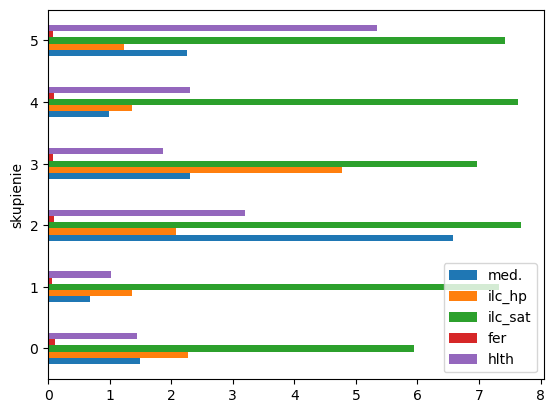

In [43]:
data_drop.groupby('skupienie').mean(numeric_only=True).plot.barh()
plt.show()

Część skupień zawiera kraje wyraźnie zbliżone geograficznie oraz ze względu na poziom rozwoju gospodarczego. W skupieniu 0 znalazły się państwa o bardzo niskim PKB per capita i kiepskich danych makroekonomicznych. <br>
W skupieniu 1 znalazło się większość krajów południa oraz wysoko rozwnięty Luksemburg. Skupienie 4 jest zbyt liczne i mało jednorodne, skupienie 5 posiada kraje nordyckie oraz Irlandie położoną na północy.

Część wartości otrzymanych środków ciężkości wyraźnie wyróżnia poszczególne skupienia. W krajach skupienia 2, wiele osób skarży się na brak możliwości dostępu do opieki medycznej z powodu kosztów i odległości podróży. <br>
Kraje należące do tego skupienia źle wypadają również pod względem oceny stanu zdrowia. Pod względem tej zmiennej najgorzej wypadają kraje północne ze skupienia 5. Grecja, Litwa i Serbia tworzą skupienie krajów o <br>
stosunkowo wysokim zadowoleniu z życia, natomiast wyraźnie wyższy niż w pozostałych grupach odsetek osób określa że nie były szczęśliwe ani razu przez ostatnie 4 tygodnie. Ludność krajów południowych skupienia 1 <br>
pozytywnie określa swoje zdowie w analizowanych aspektach. Najmniejszy odsetek osób narzeka na zły stan zdrowia, niewielki udział ludności ma problem z uzyskaniem usług zdrowotnych.


##### Metoda hierarchiczna

In [44]:
data_ward = linkage(data_std, 
                    method='ward')

set_link_color_palette(['aqua', 'blue', 'magenta', 'orange','red','green'])

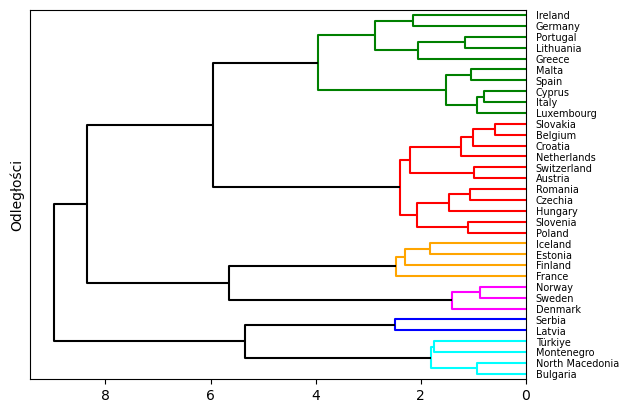

In [45]:
dendrogram(data_ward,
          leaf_rotation=0,
          labels=data.index,
          orientation='left',
          leaf_font_size=7,
          color_threshold=4, 
          above_threshold_color='black') 

plt.ylabel('Odległości')
plt.show()

Utworzone z wykorzystaniem metody Warda skupienia są bliżone do tych w metodzie k-skupień. Przy wybranej wysokości krytycznej również powstało 6 skupień.

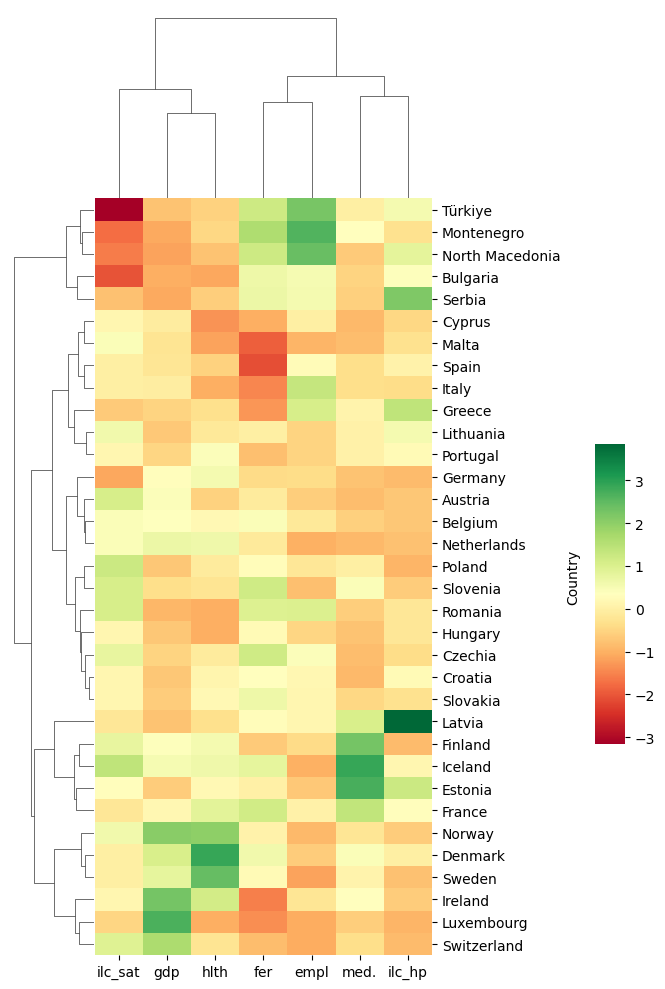

In [46]:
sns.clustermap(data, 
               z_score=1, 
               method='ward',
               cmap='RdYlGn',
               cbar_pos=(1, 0.25, 0.05, 0.3),
               figsize=(6,10))

Dla zmiennych w większości państw obserwacje standaryzowane przyjmują wartości ujemne. Dla zmiennej ilc_sat najbardziej odstaje Turcja razem z Czarnogóra, Macedonią Północną oraz Bułgarią.<br>
Dla tych państw najwyższy jest również wskaźnik osób niepracującyh lub niekształcących się.<br>
Luksemburg wyróżnia się pod względem zmiennej gdp a razem z nim Irlandia oraz Szwajcaria osiągają najwyższe wartości dla standaryzowanej zmiennej gdp.<br>
Pod względem zmiennej dot. wskaźnika poziomu stanu zdrowia obywateli najwyższe wartości uzyskują państwa skandynawskie na czele z Danią.<br>
Islandia oraz Estonia charakteryzują się wysokim poziomem zaspokojenia się obywateli w zakresie badań lekarskich. Ciemnozielony kolor pojawia się dla zmiennej ilc_hp na Łotwie.<br>
Zmienne nie tworzą silnie jednorodnych skupień, co ciekawe zmienne ilc_hp i ilc_sat dotyczące zadowolenia z życia nie zostały przyporządkowane do jednego skupienia.

In [47]:
clusters = cut_tree(data_ward, 
                    n_clusters=6)
clusters

array([[0],
       [1],
       [0],
       [2],
       [3],
       [4],
       [3],
       [3],
       [3],
       [4],
       [0],
       [3],
       [3],
       [5],
       [3],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [4],
       [2],
       [4],
       [2],
       [0],
       [1],
       [1],
       [5],
       [1]])

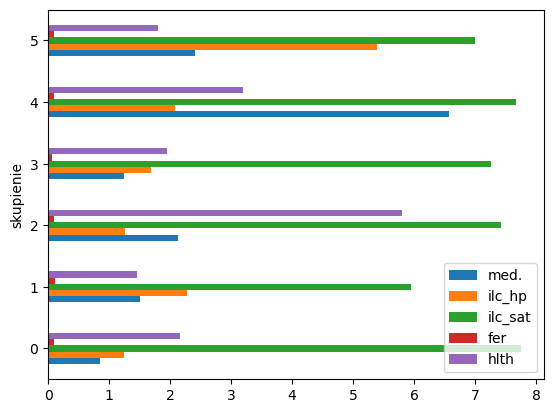

In [48]:
data_drop['skupienie'] = clusters
data_drop.groupby('skupienie').mean(numeric_only=True).plot.barh()
plt.show()

In [49]:
hclusters = 6
for i in range(hclusters):
    print(f'''W skupieniu {i} są następujące obiekty:\
    {data_drop[data_drop['skupienie'] == i].index.values}''')

W skupieniu 0 są następujące obiekty:    ['Belgium' 'Czechia' 'Croatia' 'Hungary' 'Netherlands' 'Austria' 'Poland'
 'Romania' 'Slovenia' 'Slovakia' 'Switzerland']
W skupieniu 1 są następujące obiekty:    ['Bulgaria' 'Montenegro' 'North Macedonia' 'Türkiye']
W skupieniu 2 są następujące obiekty:    ['Denmark' 'Sweden' 'Norway']
W skupieniu 3 są następujące obiekty:    ['Germany' 'Ireland' 'Greece' 'Spain' 'Italy' 'Cyprus' 'Lithuania'
 'Luxembourg' 'Malta' 'Portugal']
W skupieniu 4 są następujące obiekty:    ['Estonia' 'France' 'Finland' 'Iceland']
W skupieniu 5 są następujące obiekty:    ['Latvia' 'Serbia']


Wykres prezentuję środki cięzkości zmiennych w 6 skupieniach. Skupienie numer 0 łączy panśtwa o wysokim poziomie satysfakcji życia wśród obywateli i stosunkowo niskim poziomie zmiennej med..<br> 
Dla skupienia 4 poziom satysfakcji również jest wysoki natomiast jednocześnie wskaśnik złego lub bardzo złego stanu zdrowia obywateli plasuje się <br>
wysoko w klasyfikacji skupień. Skupienie nr 1 to państwa w których obywatele są w najmniejszym stopniu usatysfakcjonowani z poziomu życia w swoim kraju.<br>
Są to również kraje o najwyższym wskaźniku osób niepracującyh lub niekształcących się.



##### Porównanie wyników analizy skupień

Obie metody poskutkowały otrzymaniem podobnych skupień choć nie identycznych. Pojedyncze państwa zmieniają przynależność do skupień dla różnych metod. <br>
Powstały dwa identyczne skupienia: <br>

* Bułgaria, Turcja, Macedonia Płn. i Czarnogóra  
* Estonia, Francja, Islandia i Finlandia 

Są to kraje wśród których istnieje silne podobieństwo pod względem wybranych w analizie wskaźników i statystyk. Pierwsza z wymienionych grup jest do siebie również zbliżona pod względem kulturoym <br>
(trzy kraje bałkańskie). Druga grupa to bardziej zróżnicowane kraje zarówno pod względem geograficznym jak i kulturowym. Uzyskana średnia wartość wskaźnika Silhouette dla metody k-średnich wskazuje na przeciętne <br>
dopasowanie krajów do skupień, co mogło wpłynąć na trudność w interpretacji rezultatów. 

Kraje które "zmieniły" swoje skupienie to między innymi Niemcy oraz Irlandia. 





#### Podsumowanie

Na podstawie wykonanej analizy należy stwierdzić, że wybrane czynniki nie wyjaśniają w znaczącym stopniu oceny zadowolenia z życia osób w wieku 25-34 lata. Przyczyną może być <br>
oparcie doboru zmiennych na podstawie badań nie wyróżniających grupy wiekowej. Dodatkowym ograniczeniem była sama dostępność danych, które często dotyczyły podobnych, lecz nie identycznych <br>
grup wiekowych. Na pytanie czy zadowolenie z życia i wysoka dzietność wśród młodych dorosłych są ze sobą ściśle powiązane nie uzyskano odpowiedzi twierdzącej. Współczynnik korelacji Pearsona i Spearmana <br>
był zbyt niski, by mówić o wyraźnej zależności.

W ramach klasyfikacji uzyskano niewiele skupień zawierających kraje o podobnej charakterystyce. Najbardziej zbliżona grupa zawierała Bułgarię, Turcje, Macedonię Północną i Czarnogórę. <br>
Państwa te wyraźnie wyróżniały się ze względu na niską satysfakcję z życia obywateli. Skupienie zawierające Estonie, Francje, Finlandie i Islandie łączy wyoski poziom rozwoju gospodarczego.